### Question#1 - How many patients were registered in each unique occupation?

In [2]:
import pandas as pd

In [169]:
#Hospitalization_Discharge
df0 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=0)
#CardiacComplications
df1 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=1)
#Responsivenes
df2 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=2)
#PatientHistory
df3 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=3)
#Labs
df4 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=4)
#Demography
df5 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=5)
#Patient_Precriptions
df6 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name=6)

In [103]:
df5.occupation.value_counts(dropna=False)
df5.occupation

occupation
UrbanResident    1670
farmer            198
Others             89
NaN                27
worker             17
Officer             7
Name: count, dtype: int64

In [109]:
df0.Admission_date

0      2017-01-24
1      2017-05-05
2      2016-11-18
3      2017-10-02
4      2019-11-17
          ...    
2003   2016-02-07
2004   2017-03-29
2005   2018-01-22
2006   2019-11-27
2007   2017-02-17
Name: Admission_date, Length: 2008, dtype: datetime64[ns]

### Question#46 Convert occupation into numeric by Label encoding

In [187]:
#importing LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

In [191]:
#Create an instance of LabelEncoder() and store it in labelencoder variable/object le
le = LabelEncoder()
#Apply fit for the occupation column
df5.occupation=le.fit_transform(df5.occupation)


distinct_occu = df5.occupation.value_counts(dropna=False)
distinct_occu

occupation
2    1670
3     198
1      89
5      27
4      17
0       7
Name: count, dtype: int64

In [65]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   inpatient_number  2008 non-null   int64  
 1   gender            2008 non-null   object 
 2   weight            2008 non-null   float64
 3   height            2008 non-null   float64
 4   BMI               2008 non-null   float64
 5   occupation        2008 non-null   int64  
 6   ageCat            2008 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 109.9+ KB


### Question#72 What % of the dataset is male vs female?

In [51]:
df5['gender'].value_counts(normalize=True)*100

gender
Female    57.918327
Male      42.081673
Name: proportion, dtype: float64

### Question#56	Using loc, retrieve the agegroup and weight between indices 101 and 201.

In [122]:
ques_56 = df5.loc[101:201, ['weight','ageCat']]
ques_56

,weight,ageCat
101,41.0,69-79
102,64.0,79-89
103,61.0,79-89
104,40.0,79-89
105,73.0,69-79
...,...,...
197,50.0,79-89
198,50.0,89-110
199,50.0,69-79
200,63.0,59-69


### Question#18	Create a heatmap on any columns of your choice including at least 1 lab value

In [46]:
df4.head()

,inpatient_number,body_temperature,pulse,respiration,systolic_blood_pressure,diastolic_blood_pressure,map,fio2,creatinine_enzymatic_method,urea,...,measured_residual_base,measured_bicarbonate,carboxyhemoglobin,body_temperature_blood_gas,oxygen_saturation,partial_oxygen_pressure,oxyhemoglobin,anion_gap,free_calcium,total_hemoglobin
0,857781,36.7,87,19,102,64,76.666667,33,108.3,12.55,...,-2.1,21.2,0.4,37.0,97.0,93.0,95.9,17.8,1.14,125.0
1,743087,36.8,95,18,150,70,96.666667,33,62.0,4.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,866418,36.5,98,18,102,67,78.666667,33,185.1,15.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,775928,36.0,73,19,110,74,86.000000,33,104.8,8.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,810128,35.0,88,19,134,62,86.000000,33,83.9,6.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='ageCat-gender'>

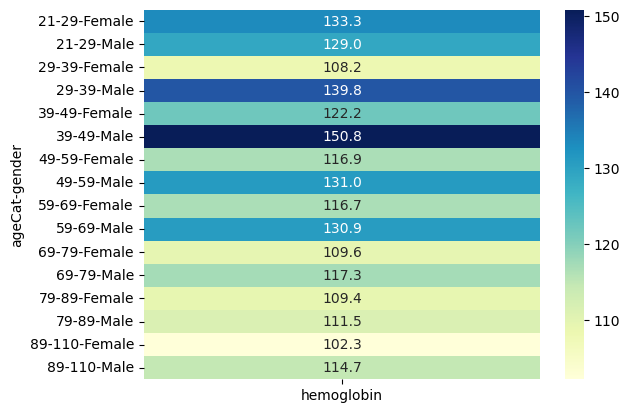

In [150]:
# importing seaborn library
import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline 
import numpy as np

# merging labs and demography datasets
df7=df4.merge(df5,on='inpatient_number')

# creating a new dataframe df7 with only he columns gender, ageCat, hemoglobin
df7=df7.loc[:,['gender','ageCat','hemoglobin']]

#calculating the average hemoglobin values for each age group
hem_agecat= df7.groupby(['ageCat','gender']).mean('hemoglobin')

#a=np.transpose('gender')
#a
#a=hem_agecat.T
#a

#a=hem_agecat.transpose('gender')

# generating heat map for these age categories and their avg Hemoglobin values
sns.heatmap(hem_agecat, annot=True, cmap='YlGnBu', fmt='.1f')

In [47]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#cor_matrix = df4['body_temperature'].corr()

#df_lb = pd.DataFrame({'pt_no':df4['inpatient_number'],'bdy_temp':df4['body_temperature'],'pulse':df4['pulse']})
df4.set_index('inpatient_number', inplace=True)
plt.figure(figsize=(15, 10))
#sns.heatmap(cor_matrix,annot=True, cmap='coolwarm', linewidths=0.5)
sns.heatmap(df4['body_temperature'],annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Body Temperature')

IndexError: Inconsistent shape between the condition and the input (got (2008, 1) and (2008,))

<Figure size 1500x1000 with 0 Axes>

In [41]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Columns: 107 entries, inpatient_number to total_hemoglobin
dtypes: float64(101), int64(6)
memory usage: 1.6 MB


### Question#65 Which Admission Ward has maximum number of visits scheduled

In [110]:
#grouping based on wards category and then adding the visit times. Then rearranging the index values
vst_adm_ward=df0.groupby('admission_ward')['visit_times'].sum().reset_index()

# sorting in desending order
max_vst= vst_adm_ward.sort_values('visit_times', ascending=False)
max_vst

# Printing the top value
print('Maximum number of visits scheduled in :',max_vst.loc[0,'admission_ward'],'ward')

Maximum number of visits scheduled in : Cardiology ward


### Question#71 -Which year had the maximum admissions

In [107]:
df0['Year']=df0['Admission_date'].dt.year
adm_year=df0.Year.value_counts(dropna=False).reset_index()
adm_year


# sorting in desending order
max_adm_year= adm_year.sort_values('count', ascending=False)
max_adm_year

# Printing the top value
print('Maximum admissions happened in the year:',max_adm_year.loc[0,'Year'])

Maximum admissions happened in the year: 2016


### Question#39 Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach


In [88]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [89]:
import numpy as np
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline 


C:\Users\laasya\AppData\Local\Temp\ipykernel_51152\4123325627.py:22: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.pi * x) + x


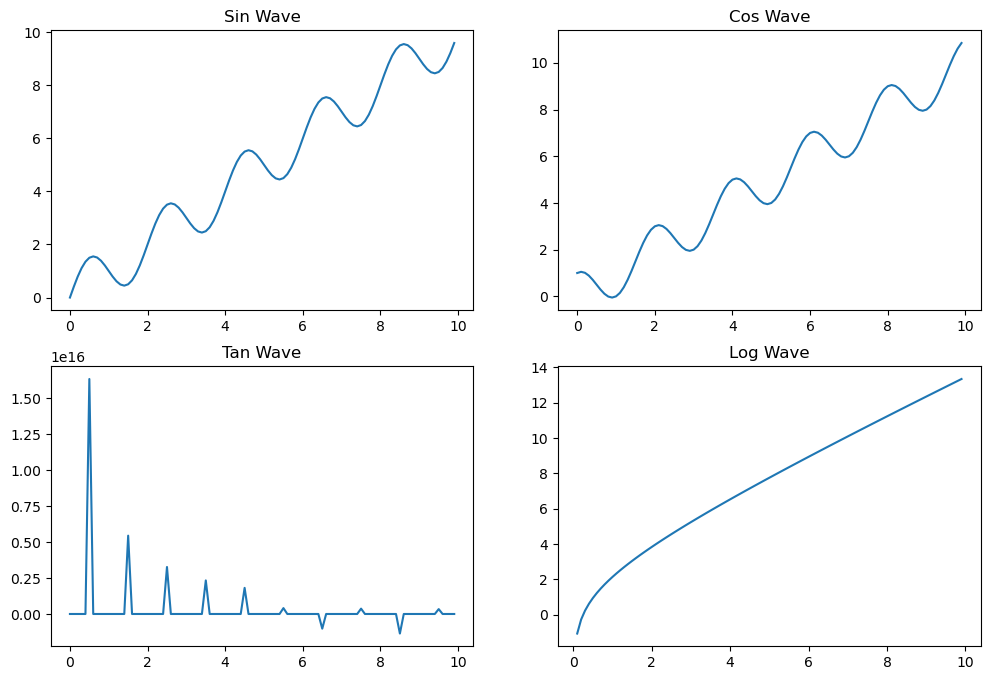

In [172]:
#creating sin wave
x = np.arange(0, 10, 0.1) 
y = np.sin(np.pi * x) + x 
fig,axs = plt.subplots(2,2,figsize=(12,8))

axs[0,0].plot(x,y)
axs[0,0].set_title('Sin Wave')

#creating cos wave
y = np.cos(np.pi * x) + x 

axs[0,1].plot(x,y)
axs[0,1].set_title('Cos Wave')

#creating tan wave
y = np.tan(np.pi * x) + x 

axs[1,0].plot(x,y)
axs[1,0].set_title('Tan Wave')

#creating log wave
y = np.log(np.pi * x) + x 

axs[1,1].plot(x,y)
axs[1,1].set_title('Log Wave');

### Question#61	np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [186]:
#creating an array 
array1=np.arange(1,31).reshape(6,5)
#print(array1)

#slicing the 11,12,16,17th elements from the array using where
slice=np.where(np.isin(array1,[11,12,16,17]))

#printing the slice
print(array1[slice])


[11 12 16 17]


### Question#11	A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid mobile number and "NO" if it is not on separate lines. Do not print the quotes. {2,9587456281,1252478965,7397260044}

In [181]:
# creating a list of mobile numbers
ph=['2','9587456281','1252478965','7397260044']

In [182]:
for i in ph:
    if len(i) == 10 and i[0] in ['7','8','9']:
        print("YES")
    else:
        print("NO")

NO
YES
NO
YES


### Question#43	Give Distribution chart of max Killip_grade

In [ ]:
import seaborn as sns

In [197]:


#sns.histplot(df1.Killip_grade.max())


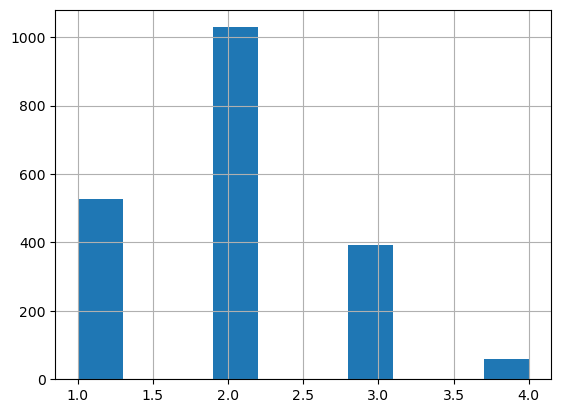

In [198]:
df1.Killip_grade.hist();

### Question#45 Create a dataframe with date and time as columns, where the values are the admission time

In [21]:
#creating a dataframe using Admission_date variable from Hospitalization_Discharge
df_date = pd.DataFrame({'Adm_date_tm':df0['Admission_date']})
df_date['date'] = df_date['Adm_date_tm'].dt.date
df_date['time'] = df_date['Adm_date_tm'].dt.time

In [22]:
df_date.head()

,Adm_dt_tm,date,time
0,2017-01-24,2017-01-24,00:00:00
1,2017-05-05,2017-05-05,00:00:00
2,2016-11-18,2016-11-18,00:00:00
3,2017-10-02,2017-10-02,00:00:00
4,2019-11-17,2019-11-17,00:00:00


### Question#70 On average, what is the most frequent weekday of admission?

In [125]:
#extracting the days of the week from date variable
df0['weekday']=df0['Admission_date'].dt.dayofweek

#counting the no of entries for each days
freq_dy= df0.weekday.value_counts(dropna=False).reset_index()

#sorting the entries count in desending order
max_cnt= freq_dy.sort_values('count', ascending=False)
max_cnt

#Mapping the corresponding days by creating a dictionary
adm_dow = {0:'Monday',
           1:'Tuesday',
           2:'Wednesday',
           3:'Thursday',
           4:'Friday',
           5:'Saturday',
           6:'Sunday'}

#using map function to map the values from dictionary
max_cnt['Admission_date']=max_cnt['Admission_date'].map(adm_dow)
max_cnt

# Printing the top value
print('Most frequent weekday of admission is:',max_cnt.loc[0,'Admission_date'])

Most frequent weekday of admission is: Monday


### Question73 Which patient in the youngest age category weighs the most?

In [147]:
#extracting only the rows with the '21-29' agecat, sorting and reseting the index
young=df5[df5['ageCat'] == '21-29'].sort_values('weight',ascending=False).reset_index()
young

# Printing the top value
print('Patient in the youngest age category weighs the most is:',young.loc[0,'inpatient_number'])


Patient in the youngest age category weighs the most is: 831184


In [33]:
df5.ageCat.value_counts(dropna=False)



df0['Year']=df0['Admission_date'].dt.year
adm_year=df0.Year.value_counts(dropna=False).reset_index()
adm_year


# sorting in desending order
max_adm_year= adm_year.sort_values('count', ascending=False)
max_adm_year

# Printing the top value
print('Maximum admissions happened in the year:',max_adm_year.loc[0,'Year'])

ageCat
69-79     715
79-89     646
59-69     368
49-59     106
89-110    101
39-49      56
29-39      12
21-29       4
Name: count, dtype: int64

### Question69 Get the list of patient ID's which are not there in prescriptions but in demographics

In [184]:
# finding the patient ID's using set difference between demographics and Prescription datasets
no_pres = set(df5['inpatient_number']) - set(df6['inpatient_number'])
print('List of patient IDs which are not there in prescriptions but in demographics are:',no_pres)

List of patient IDs which are not there in prescriptions but in demographics are: {789308}


### Question#51 Display a violin chart to show distribution of Pulse Rate against age.

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#no need to write plt.show everytime
%matplotlib inline 


In [36]:
df4.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Columns: 107 entries, inpatient_number to total_hemoglobin
dtypes: float64(101), int64(6)
memory usage: 1.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   inpatient_number  2008 non-null   int64  
 1   gender            2008 non-null   object 
 2   weight            2008 non-null   float64
 3   height            2008 non-null   float64
 4   BMI               2008 non-null   float64
 5   occupation        1981 non-null   object 
 6   ageCat            2008 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 109.9+ KB


In [40]:
vio_ch = vio_ch.merge(df4['inpatient_number','pulse'],df5[['inpatient_number','ageCat']],on='inpatient_number')

NameError: name 'vio_ch' is not defined

In [ ]:
sns.violinplot(data=[data1['Value'], data3['Value'], data5['Value']], ax=ax1])


In [ ]:
matplotlib.pyplot.violinplot(dataset, positions=None, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=False, quantiles=None, points=100, bw_method=None, *, data=None)[source]


### Question52	Create a Point Plot on Age against time to readmission.


In [ ]:
df6.info()

# merging labs and demography datasets
df7=df4.merge(df5,on='inpatient_number')

# creating a new dataframe df7 with only he columns gender, ageCat, hemoglobin
df7=df7.loc[:,['gender','ageCat','hemoglobin']]